In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
obs = pd.read_csv('관측데이터.csv')
pred = pd.read_csv('예측데이터.csv')

In [ ]:
obs.columns = ['datetime', 'humidity_obs', 'temp_obs', 'pressure_obs']
pred.columns = ['datetime', 'solar_rad_pred', 'humidity_pred', 'absolute_humidity_pred', 'temp_pred', 'pressure_pred']

In [ ]:
# 대기압 단위 통일 - hPa 기준으로
obs['pressure_obs'] = obs['pressure_obs'] * 1.33322

In [ ]:
obs['datetime'] = pd.to_datetime(obs.iloc[:, 0])
pred['datetime'] = pd.to_datetime(pred.iloc[:, 0])

# set 차집합으로 비교
obs_dates = set(obs['datetime'])
pred_dates = set(pred['datetime'])

only_in_obs = sorted(obs_dates - pred_dates)
only_in_pred = sorted(pred_dates - obs_dates)

# 결과 출력
print(f"📌 관측에는 있고 예측에는 없는 날짜 수: {len(only_in_obs)}")
print(only_in_obs[:10])  # 상위 10개만 출력

print(f"\n📌 예측에는 있고 관측에는 없는 날짜 수: {len(only_in_pred)}")
print(only_in_pred[:10])  # 상위 10개만 출력

📌 관측에는 있고 예측에는 없는 날짜 수: 336
[Timestamp('2024-05-15 01:00:00'), Timestamp('2024-05-15 02:00:00'), Timestamp('2024-05-15 03:00:00'), Timestamp('2024-05-15 04:00:00'), Timestamp('2024-05-15 05:00:00'), Timestamp('2024-05-15 06:00:00'), Timestamp('2024-05-15 07:00:00'), Timestamp('2024-05-15 08:00:00'), Timestamp('2024-05-15 09:00:00'), Timestamp('2024-05-15 10:00:00')]

📌 예측에는 있고 관측에는 없는 날짜 수: 1
[Timestamp('2025-04-01 00:00:00')]


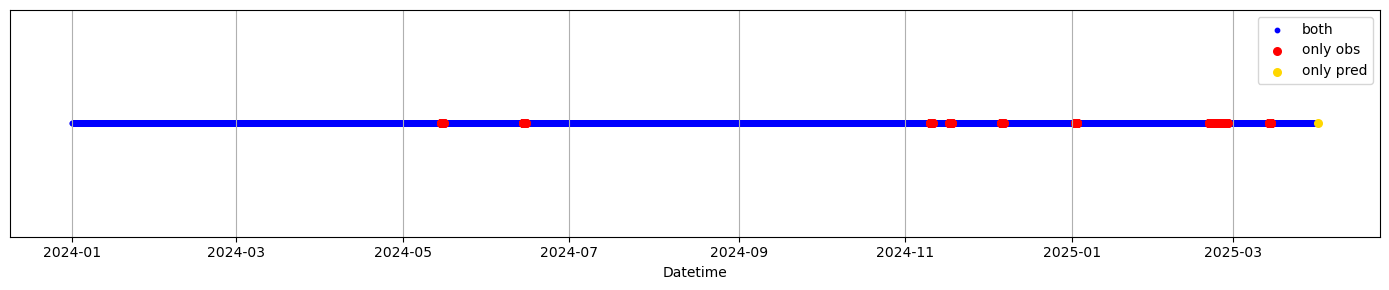

In [ ]:
dates_both = sorted(obs_dates & pred_dates)
dates_only_obs = sorted(obs_dates - pred_dates)
dates_only_pred = sorted(pred_dates - obs_dates)

# 4. 시각화
plt.figure(figsize=(14, 3))
plt.scatter(dates_both, [1]*len(dates_both), color='blue', label='both', s=10)
plt.scatter(dates_only_obs, [1]*len(dates_only_obs), color='red', label='only obs', s=30)
plt.scatter(dates_only_pred, [1]*len(dates_only_pred), color='gold', label='only pred', s=30)

plt.yticks([])
plt.xlabel("Datetime")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.merge(obs, pred, on='datetime')
df['temp_error'] = df['temp_pred'] - df['temp_obs']
df['humidity_error'] = df['humidity_pred'] - df['humidity_obs']
df['pressure_error'] = df['pressure_pred'] - df['pressure_obs']

In [ ]:
# 시간 정보 파생
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['year'] = df['datetime'].dt.year

In [ ]:
# 24시간 주기 변환
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# 12개월 주기 변환
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [ ]:
df

,datetime,humidity_obs,temp_obs,pressure_obs,solar_rad_pred,humidity_pred,absolute_humidity_pred,temp_pred,pressure_pred,temp_error,humidity_error,pressure_error,hour,month,day,year,hour_sin,hour_cos,month_sin,month_cos
0,2024-01-01 00:00:00,85.23,3.82,1019.203934,0.0,57.061,0.004,0.803,1008.51410,-3.017,-28.169,-10.689834,0,1,1,2024,0.000000,1.000000,0.5,8.660254e-01
1,2024-01-01 01:00:00,86.75,3.76,1019.498069,0.0,58.348,0.004,1.141,1009.15190,-2.619,-28.402,-10.346169,1,1,1,2024,0.258819,0.965926,0.5,8.660254e-01
2,2024-01-01 02:00:00,86.43,3.04,1019.987894,0.0,58.897,0.004,1.417,1009.56665,-1.623,-27.533,-10.421244,2,1,1,2024,0.500000,0.866025,0.5,8.660254e-01
3,2024-01-01 03:00:00,90.60,1.99,1020.475266,0.0,58.438,0.004,1.498,1009.90460,-0.492,-32.162,-10.570666,3,1,1,2024,0.707107,0.707107,0.5,8.660254e-01
4,2024-01-01 04:00:00,92.59,1.25,1020.734017,0.0,58.286,0.004,1.172,1010.04236,-0.078,-34.304,-10.691657,4,1,1,2024,0.866025,0.500000,0.5,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603,2025-03-31 19:00:00,34.78,11.20,1016.234293,0.0,35.105,0.003,7.487,1008.51166,-3.713,0.325,-7.722633,19,3,31,2025,-0.965926,0.258819,1.0,6.123234e-17
10604,2025-03-31 20:00:00,38.48,9.89,1016.834348,0.0,41.710,0.004,6.140,1008.87980,-3.750,3.230,-7.954548,20,3,31,2025,-0.866025,0.500000,1.0,6.123234e-17
10605,2025-03-31 21:00:00,44.51,8.76,1017.468961,0.0,45.688,0.004,4.839,1009.09564,-3.921,1.178,-8.373321,21,3,31,2025,-0.707107,0.707107,1.0,6.123234e-17
10606,2025-03-31 22:00:00,51.41,7.92,1017.968212,0.0,48.204,0.004,4.344,1009.18286,-3.576,-3.206,-8.785352,22,3,31,2025,-0.500000,0.866025,1.0,6.123234e-17


In [ ]:
def plot_error_eda(df, variable: str, days: int = 30, relative: bool = False, center: bool = False):
    """
    Plot error EDA for temperature, humidity, or pressure.

    Parameters:
    - df: merged DataFrame with obs + pred
    - variable: 'temp', 'humidity', or 'pressure'
    - days: how many days to show in time series
    - relative: if True, show relative error (%)
    - center: if True, center the error by subtracting mean
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 기본 컬럼 이름 설정
    obs_col = f"{variable}_obs"
    pred_col = f"{variable}_pred"

    # 에러 계산
    if relative:
        error_col = f"{variable}_rel_error"
        df[error_col] = (df[obs_col] - df[pred_col]) / df[pred_col] * 100  # %
        error_ylabel = 'Relative Error (%)'
    else:
        error_col = f"{variable}_error"
        df[error_col] = df[obs_col] - df[pred_col]
        error_ylabel = 'Observed - Predicted'

    # 중심화 처리
    if center:
        mean_val = df[error_col].mean()
        df[error_col] = df[error_col] - mean_val
        error_ylabel += ' (Centered)'

    # 시간 파생
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    df['month'] = df['datetime'].dt.month

    # 시계열 하위셋
    start_date = df['datetime'].min()
    end_date = start_date + pd.Timedelta(days=days)
    subset = df[(df['datetime'] >= start_date) & (df['datetime'] < end_date)]

    # (1) 시계열 그래프
    plt.figure(figsize=(14, 4))
    plt.plot(subset['datetime'], subset[error_col], label=f'{variable} error')
    plt.axhline(0, color='black', linestyle='--')
    plt.title(f'{variable.capitalize()} Error Over Time ({days} days)')
    plt.ylabel(error_ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # (2) 시간대별 Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='hour', y=error_col, data=df)
    plt.title(f'{variable.capitalize()} Error by Hour')
    plt.axhline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

    # (3) 요일별 Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='weekday', y=error_col, data=df)
    plt.title(f'{variable.capitalize()} Error by Weekday')
    plt.axhline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

    # (4) 월별 Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='month', y=error_col, data=df)
    plt.title(f'{variable.capitalize()} Error by Month')
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Month')
    plt.ylabel(error_ylabel)
    plt.tight_layout()
    plt.show()

    # (5) 예측값 vs 오차 산점도
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=pred_col, y=error_col, data=df, alpha=0.4)
    plt.title(f'Predicted {variable.capitalize()} vs Error')
    plt.axhline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

    # (6) 히스토그램
    plt.figure()
    sns.histplot(df[error_col], bins=40, kde=True)
    plt.title(f'Distribution of {variable.capitalize()} Error')
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

    # (7) Heatmap: Hour x Weekday
    pivot = df.pivot_table(index='hour', columns='weekday', values=error_col, aggfunc='mean')
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{variable.capitalize()} Error Heatmap (Hour x Weekday)')
    plt.tight_layout()
    plt.show()




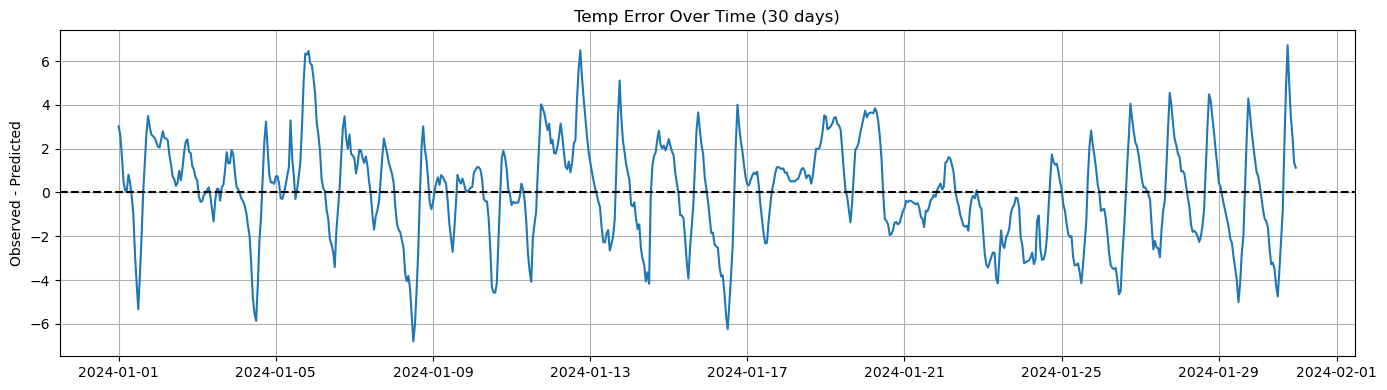

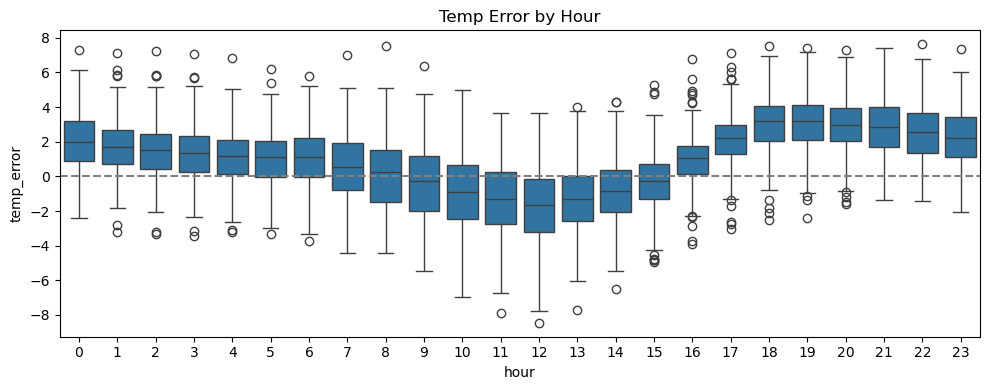

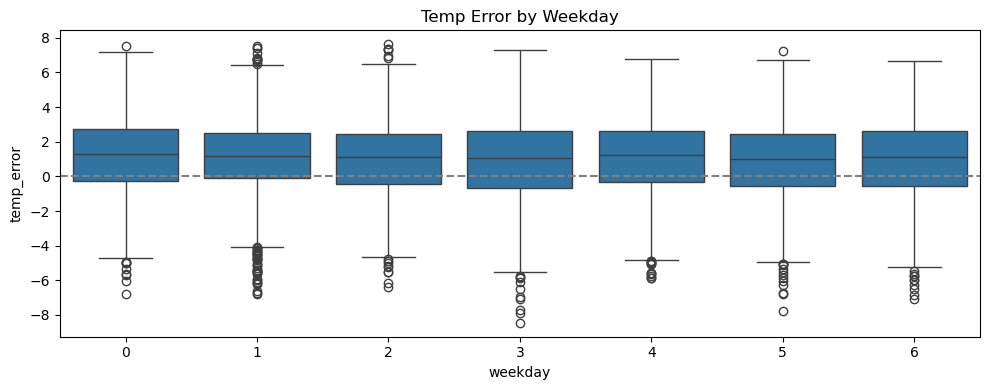

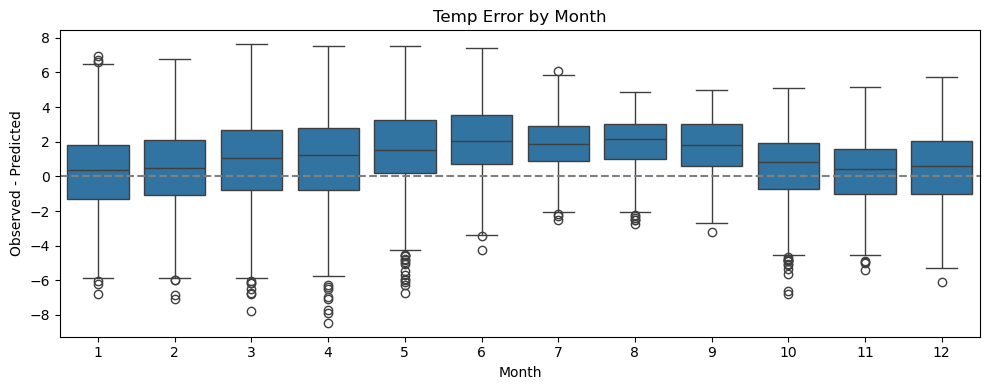

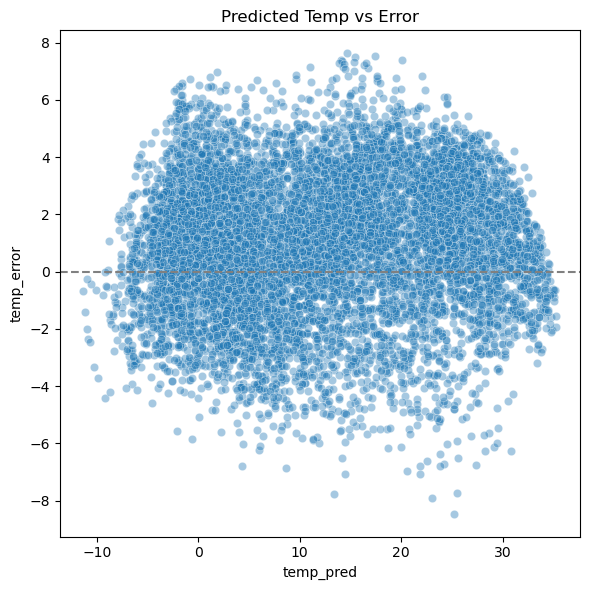

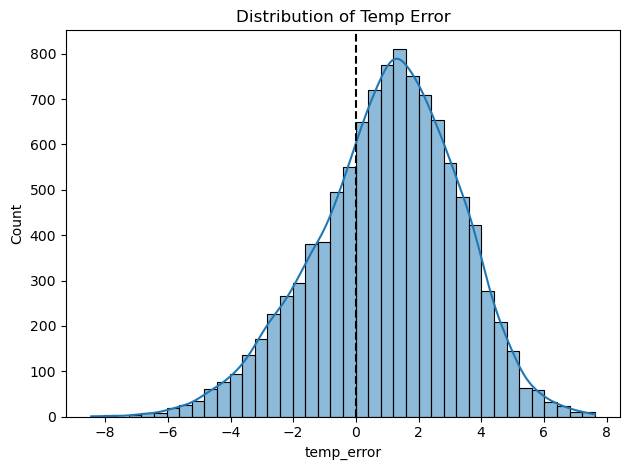

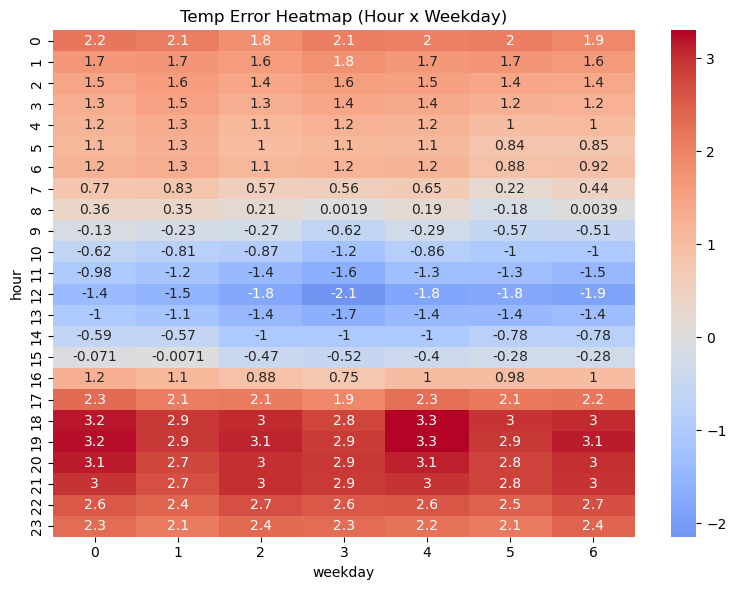

In [ ]:
plot_error_eda(df, variable='temp')

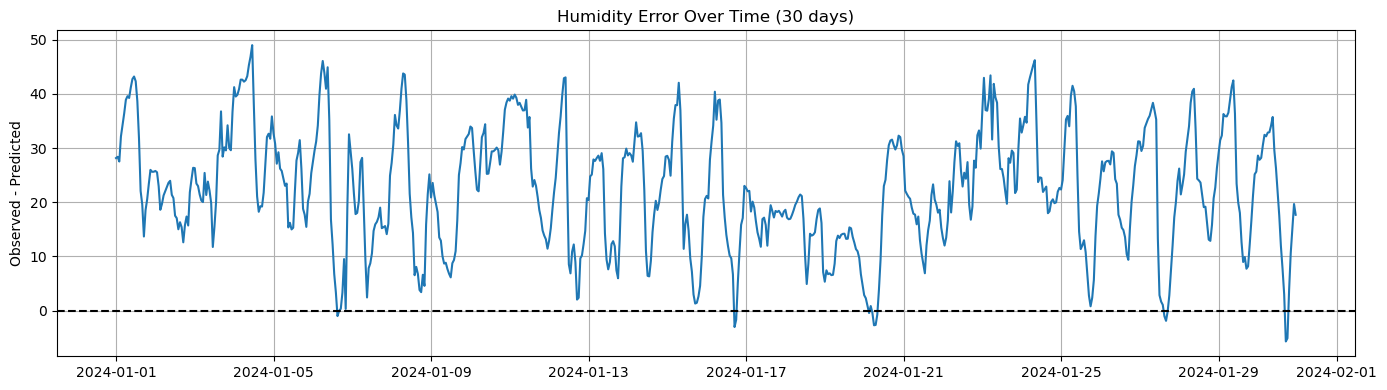

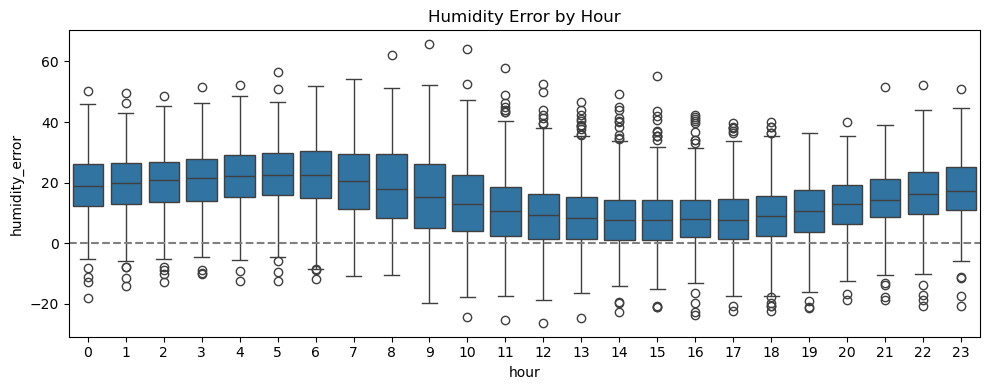

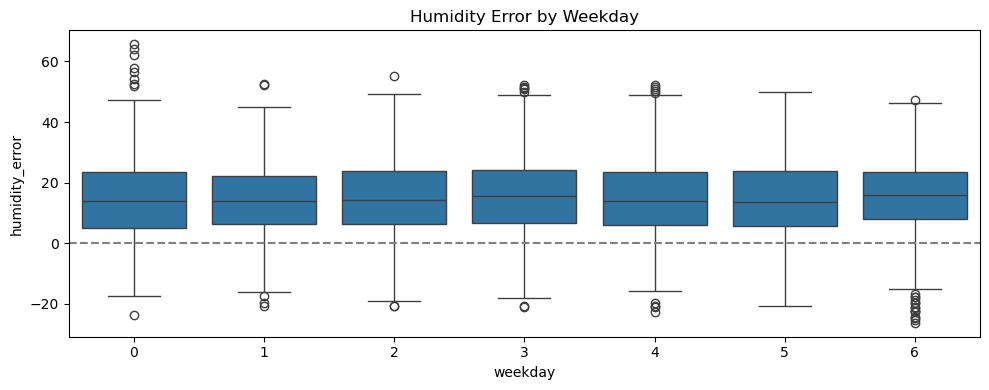

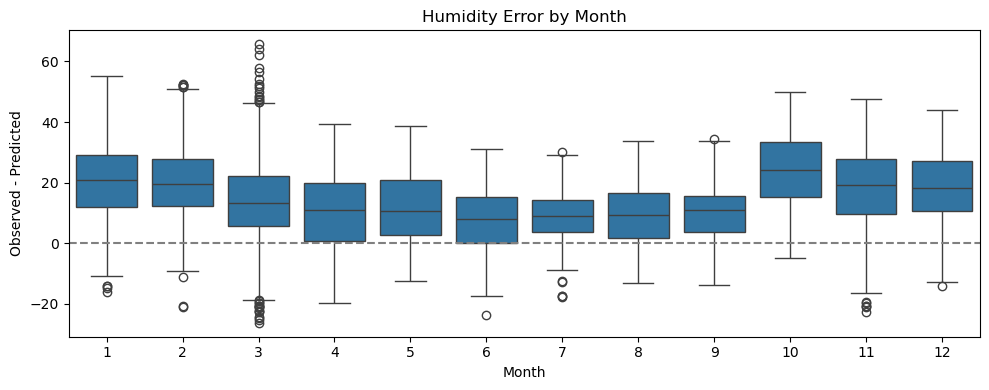

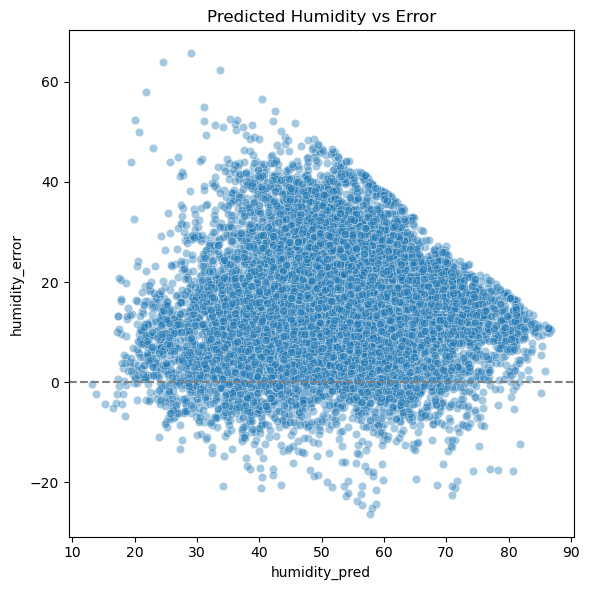

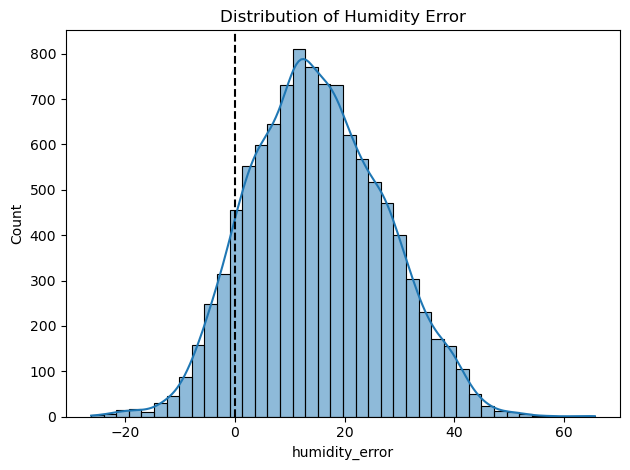

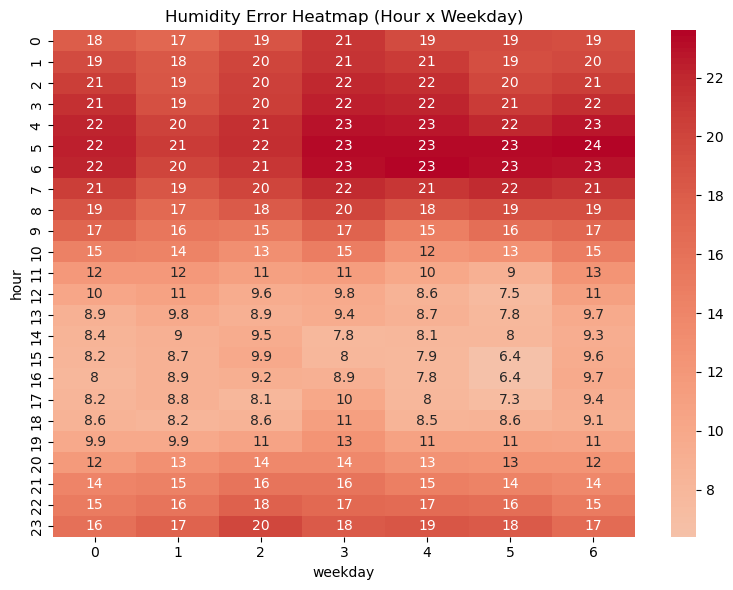

In [ ]:
plot_error_eda(df, variable='humidity')

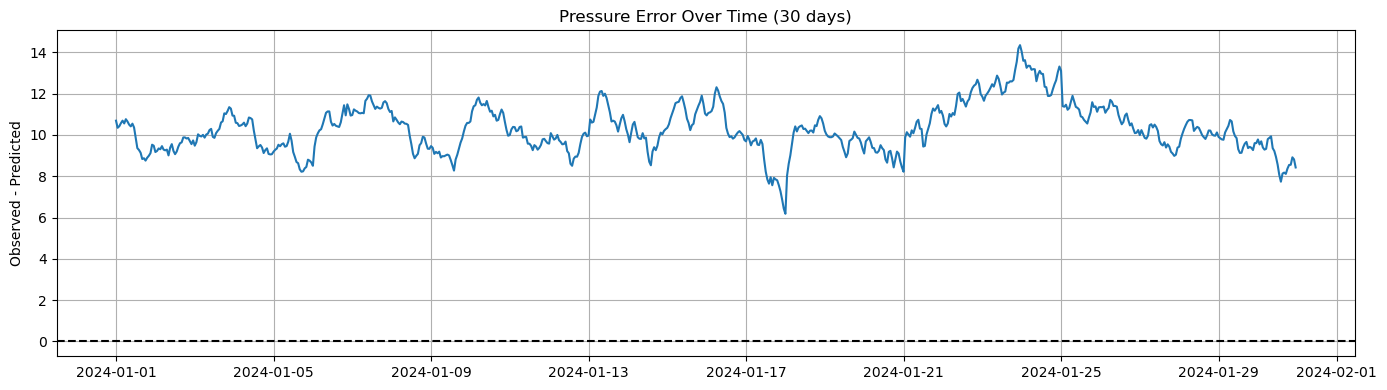

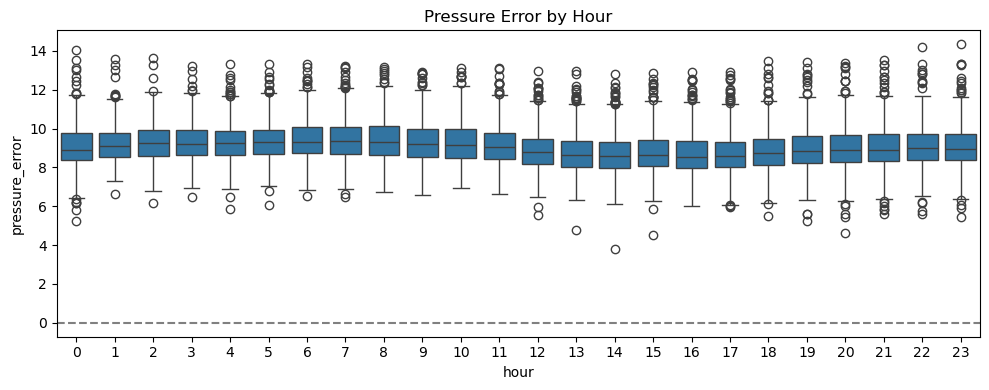

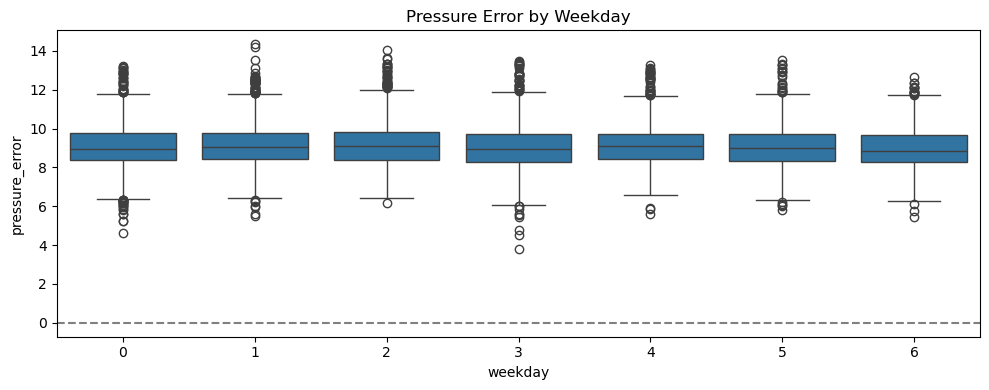

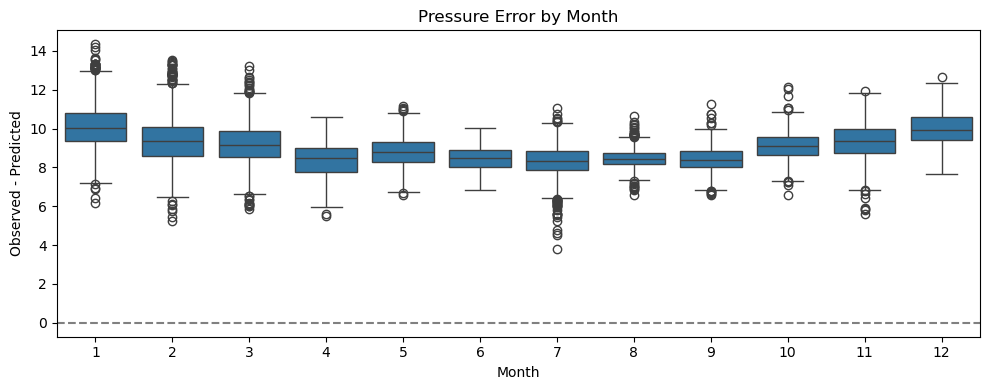

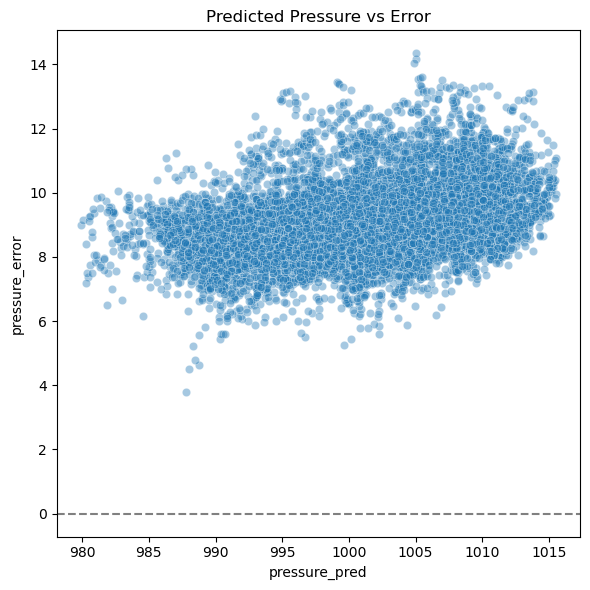

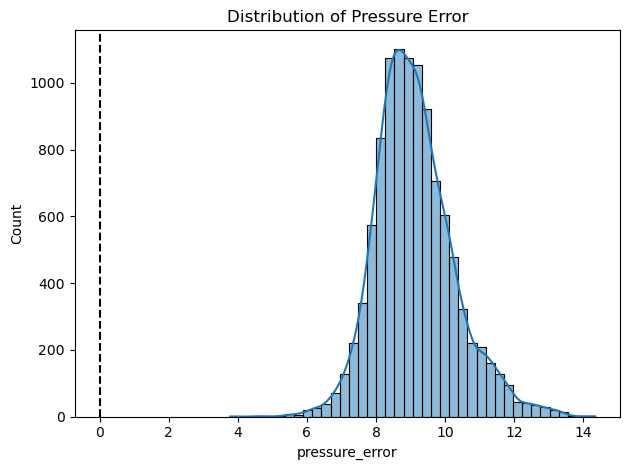

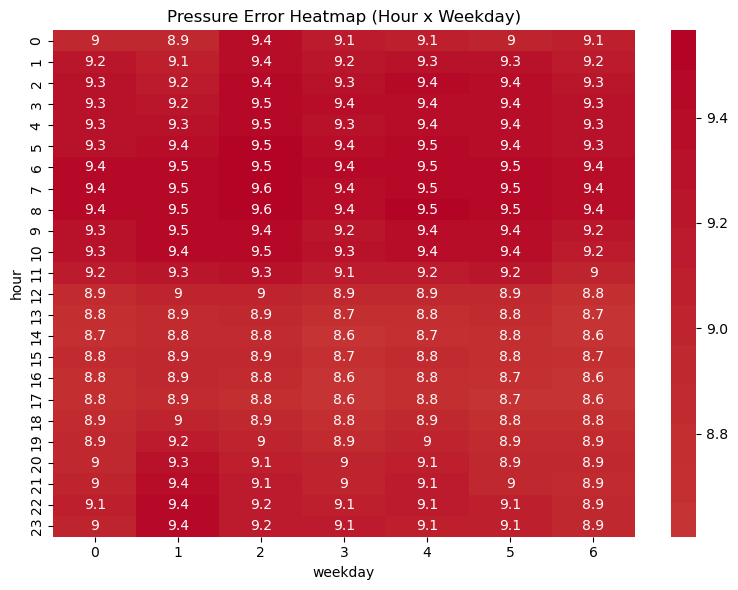

In [ ]:
plot_error_eda(df, variable='pressure')

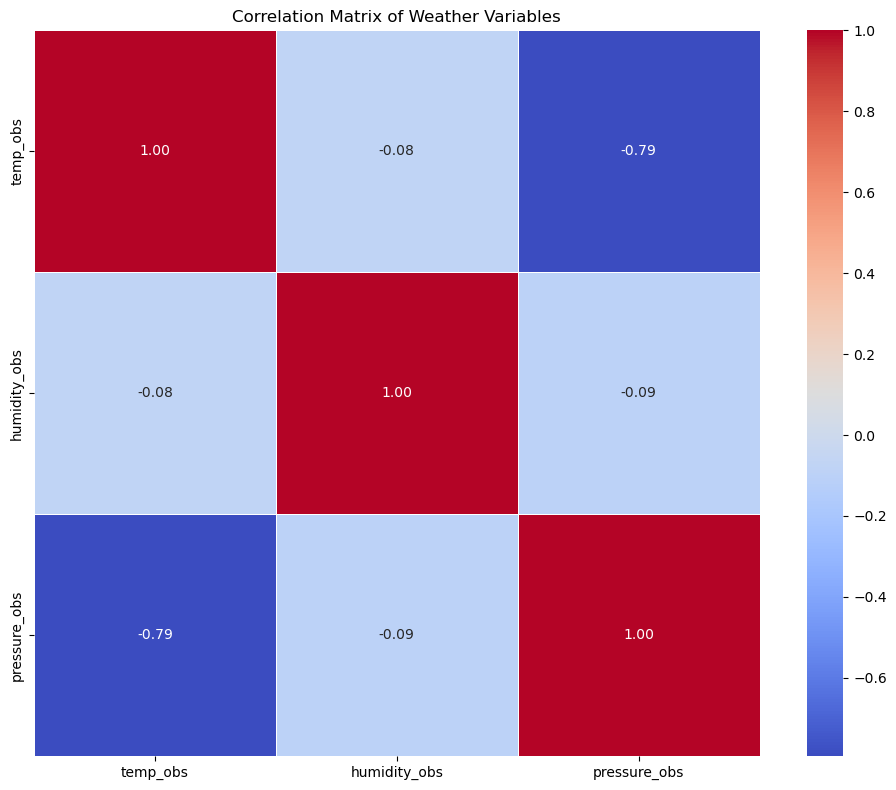

In [ ]:
# 1. 분석 대상 컬럼만 선택
# 관측값과 예측값 둘 다 포함해도 좋고, 필요한 경우 관측값만 사용할 수도 있어요.
corr_cols = [
     'temp_obs', 'humidity_obs', 'pressure_obs',
]

# 2. 상관계수 계산
corr_matrix = df[corr_cols].corr(method='pearson')

# 3. 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables')
plt.tight_layout()
plt.show()